In [16]:
# importing libraries

import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

In [2]:
# Loading csv file
reviews=pd.read_csv('googleplaystore_user_reviews.csv')
gps_df=pd.read_csv('gps_df.csv')

In [3]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [4]:
# Joining the two datasets
merged_df=pd.merge(gps_df,reviews, on='App',how='inner')

In [5]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Day,Updated_Month,Updated_Year,Install_category,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018,Very High,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018,Very High,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018,Very High,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018,Very High,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018,Very High,I love colors inspyering,Positive,0.500,0.600000


In [6]:
# dropping the empty values from columns=['Sentiment','Translated_Review'] 
# if either of them has nan then that row will be dropped
merged_df=merged_df.dropna(subset=['Sentiment','Translated_Review'])


# ***Group Data by 'Category' and 'Sentiment'***

In [7]:
# what we are doing is grouping by category 
# then arranging it by sentiment and then creating a separate column which says app count
grouped_category_sentiment_count=merged_df.groupby(['Category','Sentiment']).agg({'App':'count'}).reset_index()

In [8]:
grouped_category_sentiment_count.head()

,Category,Sentiment,App
0,ART_AND_DESIGN,Negative,61
1,ART_AND_DESIGN,Neutral,62
2,ART_AND_DESIGN,Positive,259
3,AUTO_AND_VEHICLES,Negative,17
4,AUTO_AND_VEHICLES,Neutral,36


In [9]:
grouped_category_sentiment_sum=merged_df.groupby(['Category']).agg({'Sentiment':'count'})

In [10]:
grouped_category_sentiment_sum.head()

,Sentiment
Category,
ART_AND_DESIGN,382
AUTO_AND_VEHICLES,289
BEAUTY,338
BOOKS_AND_REFERENCE,776
BUSINESS,1261


In [11]:
new_df=pd.merge(grouped_category_sentiment_count,grouped_category_sentiment_sum,on=['Category'])

In [12]:
new_df.head()

,Category,Sentiment_x,App,Sentiment_y
0,ART_AND_DESIGN,Negative,61,382
1,ART_AND_DESIGN,Neutral,62,382
2,ART_AND_DESIGN,Positive,259,382
3,AUTO_AND_VEHICLES,Negative,17,289
4,AUTO_AND_VEHICLES,Neutral,36,289


In [13]:
new_df['sentiment_normalized']=new_df.App/new_df.Sentiment_y

In [14]:
new_df.head()

,Category,Sentiment_x,App,Sentiment_y,sentiment_normalized
0,ART_AND_DESIGN,Negative,61,382,0.159686
1,ART_AND_DESIGN,Neutral,62,382,0.162304
2,ART_AND_DESIGN,Positive,259,382,0.678010
3,AUTO_AND_VEHICLES,Negative,17,289,0.058824
4,AUTO_AND_VEHICLES,Neutral,36,289,0.124567


## ***Cateogry wise Reviews Distribution***

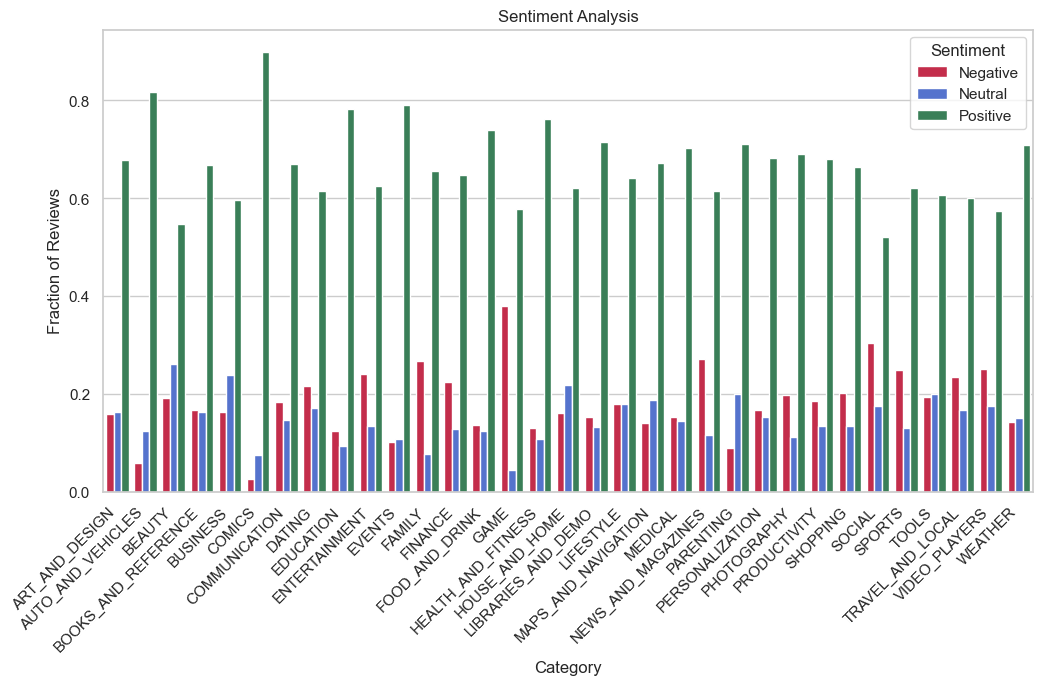

In [18]:

# Convert 'Sentiment_x' to categorical type to ensure order
sentiment_order = ['Negative', 'Neutral', 'Positive']
new_df['Sentiment_x'] = pd.Categorical(new_df['Sentiment_x'], categories=sentiment_order, ordered=True)

# Define a color palette matching the original
colors = {'Negative': 'crimson', 'Neutral': 'royalblue', 'Positive': 'seagreen'}

# Plot
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    data=new_df,
    x="Category",
    y="sentiment_normalized",
    hue="Sentiment_x",  # Replacing Sentiment with Sentiment_x
    palette=colors
)

# Formatting

plt.xticks(rotation=45, ha='right')
plt.xlabel("Category")
plt.ylabel("Fraction of Reviews")
plt.title("Sentiment Analysis")

# Show legend
plt.legend(title="Sentiment")

# Show the plot
plt.show()


<div style="padding: 20px; border-color: #4CAF50; border-radius: 8px; box-shadow: 0 2px 6px 0 rgba(0, 0, 0, 0.2); border: 2px solid #4CAF50; width: 85%; margin: 20px auto; background-color: #f4fff4;">
    <p style="font-size: 20px; font-family: 'Georgia'; line-height: 1.8em; color: #333;">
        1. Comic category has the most no. of positive reviews 🙂 </p>
    <p style="font-size: 20px; font-family: 'Georgia'; line-height: 1.8em; color: #333;">
        2. Game category has the most no of negative reviews 😖 </p>
    <p style="font-size: 20px; font-family: 'Georgia'; line-height: 1.8em; color: #333;">
        3. Beauty catefory has the most no. of neutranl reviews 😑</p>
</div>


## ***Free V/S Paid app review comparision***

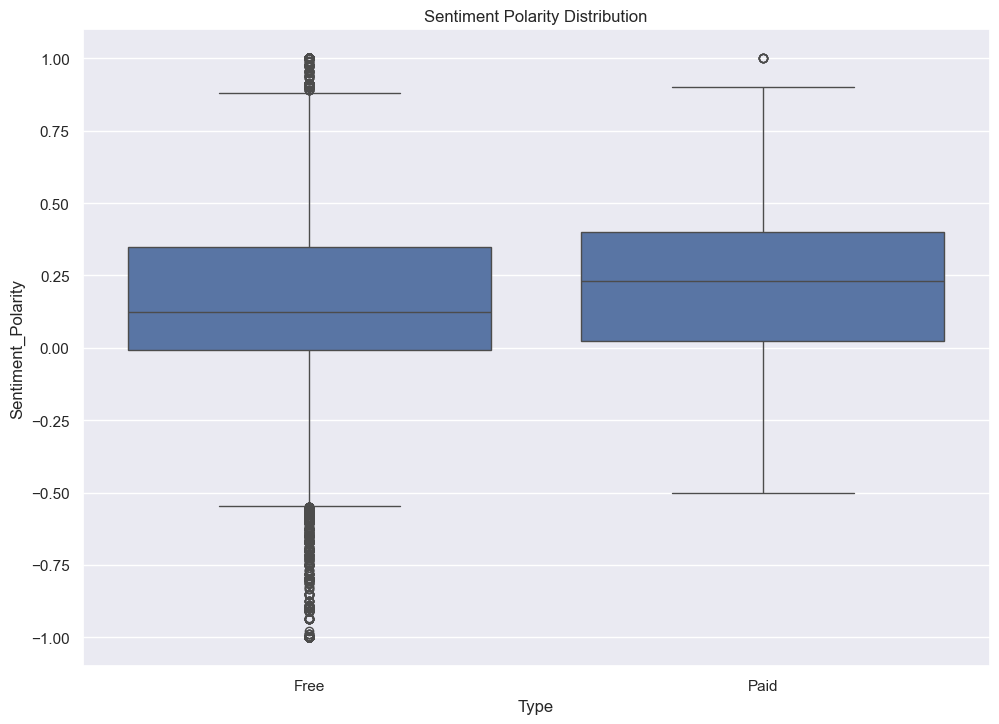

In [20]:
#merged_df.loc[merged_df.Type=='Free']['Sentiment_Polarity']
sns.set_style('ticks')
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df)
title = ax.set_title('Sentiment Polarity Distribution')

<div style="padding: 20px; border-color: #4CAF50; border-radius: 8px; box-shadow: 0 2px 6px 0 rgba(0, 0, 0, 0.2); border: 2px solid #4CAF50; width: 85%; margin: 20px auto; background-color: #f4fff4;">
    <p style="font-size: 20px; font-family: 'Georgia'; line-height: 1.8em; color: #333;">
1. Free apps tend to receive a significant number of harsh reviews, often appearing as outliers on the negative Y-axis.
 </p>
    <p style="font-size: 20px; font-family: 'Georgia'; line-height: 1.8em; color: #333;">
2. Users show more leniency when reviewing paid apps, using moderate language. Extremely negative reviews are rare for paid apps.</p>

</div>


--------Interpretation-----------




## ***WordCloud***

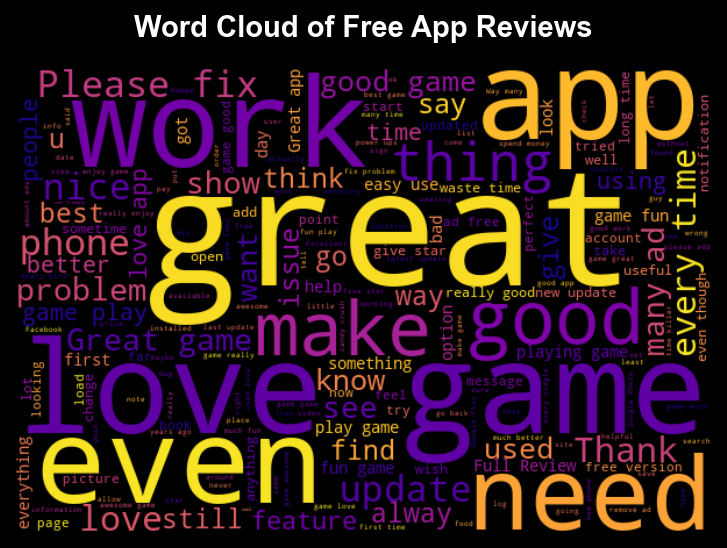

In [22]:
# Set a valid style
plt.style.use("dark_background")  # Dark mode for aesthetics

# Define custom stopwords
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update([
    'app', 'APP', 'ap', 'App', 'apps', 'application', 'browser', 'website', 'websites', 
    'chrome', 'click', 'web', 'ip', 'address', 'files', 'android', 'browse', 
    'service', 'use', 'one', 'download', 'email', 'Launcher'
])

# Preprocess reviews
merged_df['Translated_Review'] = merged_df['Translated_Review'].astype(str).apply(
    lambda x: " ".join(word for word in x.split() if word.lower() not in custom_stopwords)
)

# Remove rows where 'app' still appears in the text
merged_df['Translated_Review'] = merged_df['Translated_Review'].apply(
    lambda x: x if 'app' not in x.split() else np.nan
)
merged_df.dropna(subset=['Translated_Review'], inplace=True)

# Generate word cloud for free apps
free_reviews = merged_df.loc[merged_df.Type == 'Free', 'Translated_Review']
text_data = ' '.join(free_reviews.dropna())

wordcloud = WordCloud(
    background_color="black",  
    max_words=200,
    colormap="plasma",  
    contour_color="white",
    contour_width=1,
    font_path=None,
    width=600, height=400  # Smaller size for a compact display
).generate(text_data)

# Display the word cloud
plt.figure(figsize=(6, 6), dpi=150)  # Reduced size for better fit
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  
plt.title("Word Cloud of Free App Reviews", fontsize=14, fontweight='bold', color='white', pad=15)
plt.show()


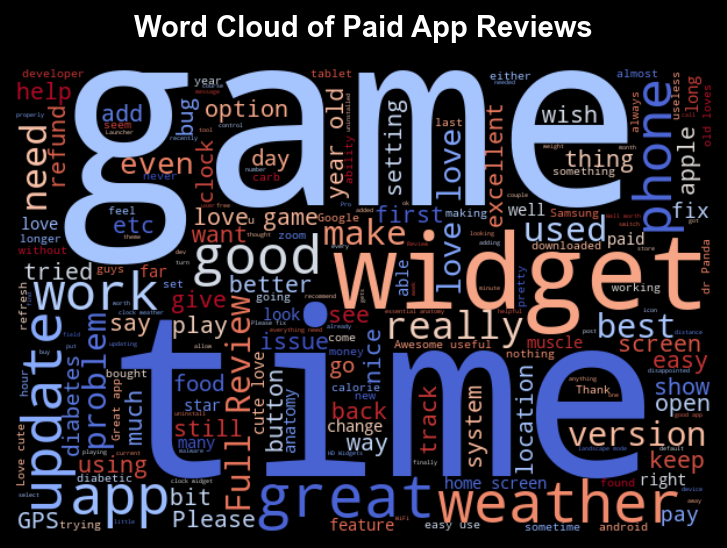

In [23]:
# Extract reviews for paid apps, ensuring NaN values are handled
paid_reviews = merged_df.loc[merged_df.Type == 'Paid', 'Translated_Review'].dropna()
text_data = ' '.join(paid_reviews.astype(str))  # Convert to string and join

# Generate word cloud
wordcloud = WordCloud(
    background_color="black",  
    max_words=200,
    colormap="coolwarm",  # A visually appealing red-blue gradient
    contour_color="white",  
    contour_width=1,
    width=600, height=400  # Adjusted size for better display
).generate(text_data)

# Display the word cloud
plt.figure(figsize=(6, 6), dpi=150)  # Smaller figure size for better fit
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Paid App Reviews", fontsize=14, fontweight='bold', color='white', pad=15)
plt.show()
